### Problem Statement
create a model to predict next 3 day stock prices using historical data

### Importing libraries and dataset

In [79]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df=pd.read_csv('tesla.csv')

In [81]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


### Data Understanding
Date: The date of the trading day.

Open: The opening price of the stock on that trading day.

High: The highest price reached by the stock during that trading day.

Low: The lowest price reached by the stock during that trading day.

Close: The closing price of the stock on that trading day.

Adj Close: The adjusted closing price, which accounts for any corporate actions such as dividends, stock splits, etc.

Volume: The total number of shares traded during that trading day.

### Basic Checks

In [82]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2193.0,1.756529e+02,1.155809e+02,16.139999,3.311000e+01,2.049900e+02,2.620000e+02,3.866900e+02
High,2193.0,1.787103e+02,1.173701e+02,16.629999,3.391000e+01,2.081600e+02,2.653300e+02,3.896100e+02
Low,2193.0,1.724121e+02,1.136548e+02,14.980000,3.246000e+01,2.016700e+02,2.562100e+02,3.793500e+02
Close,2193.0,1.756486e+02,1.155808e+02,15.800000,3.316000e+01,2.049900e+02,2.617400e+02,3.850000e+02
Adj Close,2193.0,1.756486e+02,1.155808e+02,15.800000,3.316000e+01,2.049900e+02,2.617400e+02,3.850000e+02
Volume,2193.0,5.077449e+06,4.545398e+06,118500.000000,1.577800e+06,4.171700e+06,6.885600e+06,3.716390e+07


In [85]:
df.shape

(2193, 7)

In [86]:
df.nunique()

Date         2193
Open         1931
High         1939
Low          1941
Close        2016
Adj Close    2016
Volume       2173
dtype: int64

In [87]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### looking for missing and duplicated values 

In [88]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [89]:
len(df[df.duplicated()])

0

No missing or duplicated values

### Converting the Datatype

In [90]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\asifa\AppData\Local\Temp\ipykernel_77688\3023999556.py:1: UserWarning: Parsing '29-06-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\asifa\AppData\Local\Temp\ipykernel_77688\3023999556.py:1: UserWarning: Parsing '30-06-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\asifa\AppData\Local\Temp\ipykernel_77688\3023999556.py:1: UserWarning: Parsing '13-07-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\asifa\AppData\Local\Temp\ipykernel_77688\3023999556.py:1: UserWarning: Parsing '14-07-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\asifa\AppData\Local\Temp\ipyker

In [91]:
print(f'Dataframe contains stock prices between {df.Date.min()} {df.Date.max()}') 
print(f'Total days = {(df.Date.max()  - df.Date.min()).days} days')

Dataframe contains stock prices between 2010-01-07 00:00:00 2019-12-03 00:00:00
Total days = 3617 days


### Visualizations

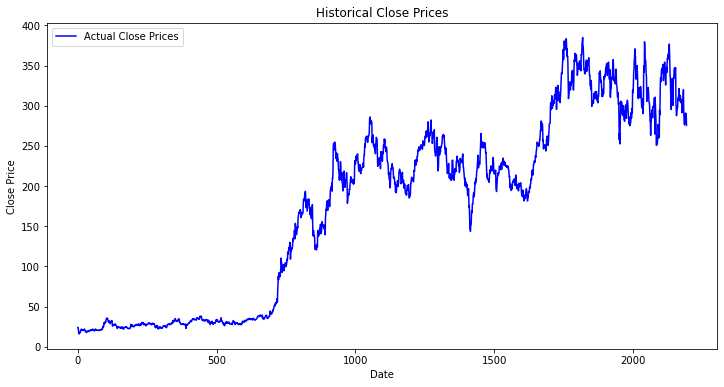

In [92]:
#plotting historical close prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual Close Prices', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Historical Close Prices')
plt.legend()
plt.show()

### Looking for outliers

U:\Users\UK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
U:\Users\UK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
U:\Users\UK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
U:\Users\UK\anaconda3\lib\site-packages\

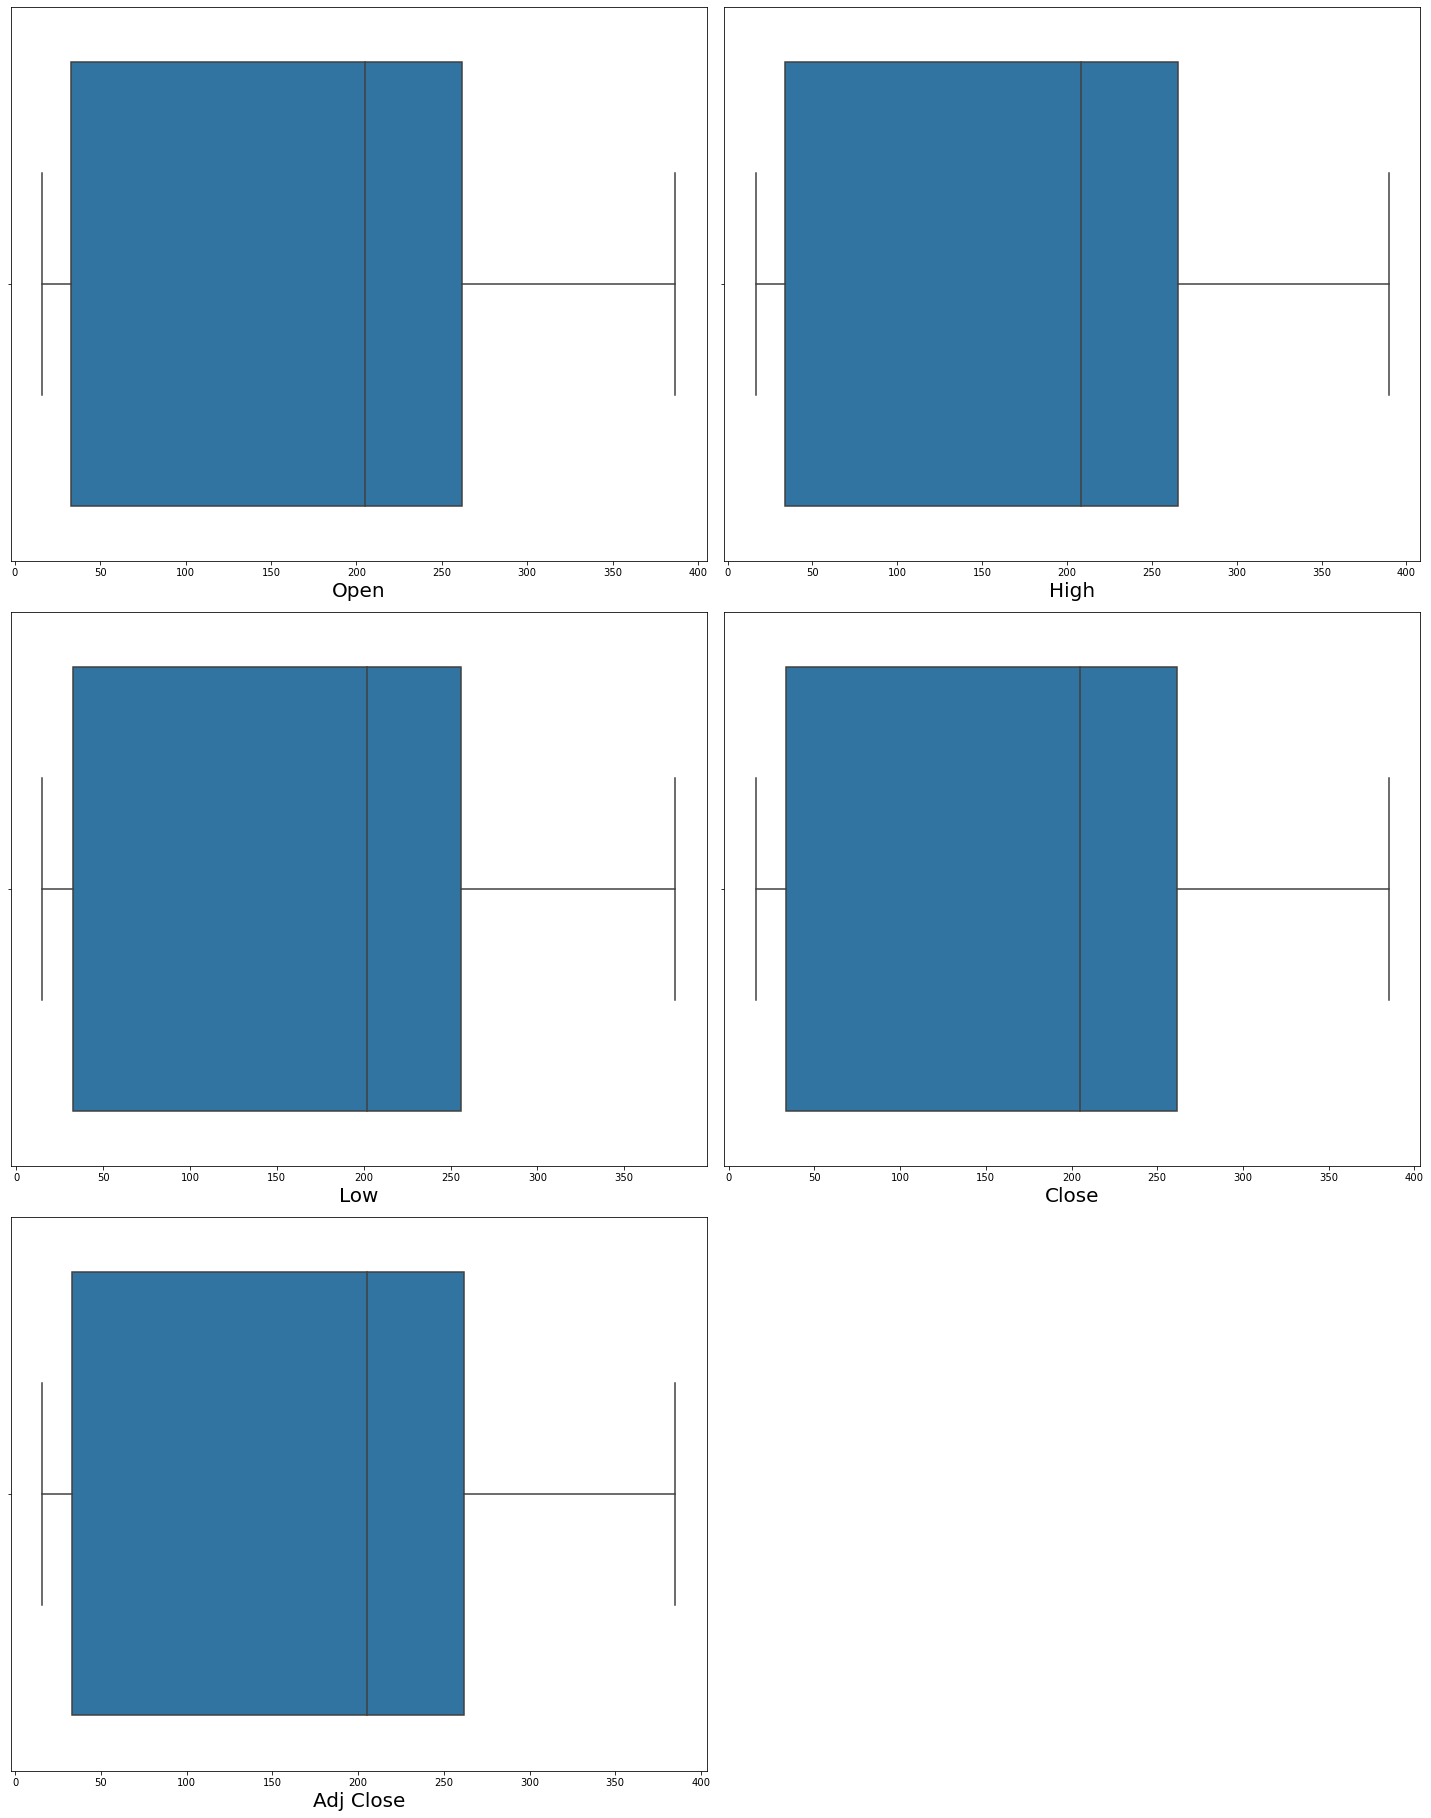

In [93]:
cols=df[['Open','High','Low','Close','Adj Close']]

plt.figure(figsize=(20,50))
plotno = 1

for column in cols:
    if plotno<=14:   
        plt.subplot(6,2,plotno) 
        sns.boxplot(cols[column]) 
        plt.xlabel(column,fontsize=20) 
    plotno+=1 
plt.tight_layout()
plt.show() 

### Standardization of data

In [94]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler() 
df[['Open','High','Low','Close','Adj Close']]=scalar.fit_transform(df[['Open','High','Low','Close','Adj Close']])

In [95]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,-1.355662,-1.309919,-1.362964,-1.313308,-1.313308,18766300
1,2010-06-30,-1.296902,-1.263730,-1.312273,-1.313827,-1.313827,17187100
2,2010-01-07,-1.303738,-1.302079,-1.338938,-1.330010,-1.330010,8218800
3,2010-02-07,-1.321046,-1.326111,-1.352667,-1.353895,-1.353895,5139800
4,2010-06-07,-1.347008,-1.352529,-1.378013,-1.380636,-1.380636,6866900
...,...,...,...,...,...,...,...
2188,2019-11-03,0.933473,0.959319,0.951236,0.997551,0.997551,7392300
2189,2019-12-03,0.959176,0.931964,0.956165,0.932127,0.932127,7504100
2190,2019-03-13,0.936762,0.965370,0.970598,0.980589,0.980589,6844700
2191,2019-03-14,1.010753,0.994345,1.019793,0.989243,0.989243,7074200


### Model Building

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [97]:
X = df.drop(columns=['Close','Date'])  # Features
y = df['Close']  # Target variable

In [98]:
X

,Open,High,Low,Adj Close,Volume
0,-1.355662,-1.309919,-1.362964,-1.313308,18766300
1,-1.296902,-1.263730,-1.312273,-1.313827,17187100
2,-1.303738,-1.302079,-1.338938,-1.330010,8218800
3,-1.321046,-1.326111,-1.352667,-1.353895,5139800
4,-1.347008,-1.352529,-1.378013,-1.380636,6866900
...,...,...,...,...,...
2188,0.933473,0.959319,0.951236,0.997551,7392300
2189,0.959176,0.931964,0.956165,0.932127,7504100
2190,0.936762,0.965370,0.970598,0.980589,6844700
2191,1.010753,0.994345,1.019793,0.989243,7074200


In [99]:
y

0      -1.313308
1      -1.313827
2      -1.330010
3      -1.353895
4      -1.380636
          ...   
2188    0.997551
2189    0.932127
2190    0.980589
2191    0.989243
2192    0.863502
Name: Close, Length: 2193, dtype: float64

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1754, 5), (439, 5), (1754,), (439,))

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [103]:
selected_features=['Open','High','Low','Close','Adj Close']

In [105]:
latest_data = df[selected_features].tail(1)  # Get the most recent row
next_3_days_features = pd.concat([latest_data] * 3, ignore_index=True)
print("Features for the next 3 days based on the latest available data:")
print(next_3_days_features)

Features for the next 3 days based on the latest available data:
       Open      High       Low     Close  Adj Close
0  0.933387  0.894927  0.897553  0.863502   0.863502
1  0.933387  0.894927  0.897553  0.863502   0.863502
2  0.933387  0.894927  0.897553  0.863502   0.863502


In [106]:
next_3_days_features = latest_data[selected_features]  # Provide the features for the next 3 days
next_3_days_predictions = model.predict(next_3_days_features)
print("Predicted Close prices for the next 3 days:", next_3_days_predictions)

Predicted Close prices for the next 3 days: [0.86350174]


U:\Users\UK\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Close
Feature names seen at fit time, yet now missing:
- Volume

  warnings.warn(message, FutureWarning)
